In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

In [4]:
day = pd.read_csv('~/anaconda3/envs/dartsess/data/day_clean.csv')
week = pd.read_csv('~/anaconda3/envs/dartsess/data/week_clean.csv')
month = pd.read_csv('~/anaconda3/envs/dartsess/data/month_clean.csv')
hour = pd.read_csv('~/anaconda3/envs/dartsess/data/hour_clean.csv')

In [5]:
alxm = pd.DataFrame(month, columns=['ds', 'alx'])
gcom = pd.DataFrame(month, columns=['ds', 'gco'])
mcom = pd.DataFrame(month, columns=['ds', 'mco'])

alxw = pd.DataFrame(week, columns=['ds', 'alx'])
gcow = pd.DataFrame(week, columns=['ds', 'gco'])
mcow = pd.DataFrame(week, columns=['ds', 'mco'])

alxd = pd.DataFrame(day, columns=['ds', 'alx'])
gcod = pd.DataFrame(day, columns=['ds', 'gco'])
mcod = pd.DataFrame(day, columns=['ds', 'mco'])

alxh = pd.DataFrame(hour, columns=['ds', 'alx'])
gcoh = pd.DataFrame(hour, columns=['ds', 'gco'])
mcoh = pd.DataFrame(hour, columns=['ds', 'mco'])

In [6]:
tr_alxm = alxm[:48]
tst_alxm = alxm[48:]

tr_gcom = gcom[:48]
tst_gcom = gcom[48:]

tr_mcom = mcom[:48]
tst_mcom = mcom[48:]

tr_alxw = alxw[:209]
tst_alxw = alxw[209:]

tr_gcow = gcow[:209]
tst_gcow = gcow[209:]

tr_mcow = mcow[:209]
tst_mcow = mcow[209:]

tr_alxd = alxd[:365]
tst_alxd = alxd[365:]

tr_gcod = gcod[:365]
tst_gcod = gcod[365:]

tr_mcod = mcod[:365]
tst_mcod = mcod[365:]

tr_alxh = alxh[:2184]
tst_alxh = alxh[2184:]

tr_gcoh = gcoh[:2184]
tst_gcoh = gcoh[2184:]

tr_mcoh = mcoh[:2184]
tst_mcoh = mcoh[2184:]

In [7]:
alxms = TimeSeries.from_dataframe(alxm, "ds", "alx")
tr_alxms = alxms[:48]
ts_alxms = alxms[48:]

In [14]:
from darts.models import ExponentialSmoothing

alxms_model = ExponentialSmoothing()
alxms_model.fit(tr_alxms)
alxms_prediction = alxms_model.predict(len(ts_alxms), num_samples=50000)

C:\Users\tony.dunsworth\anaconda3\envs\dartsess\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


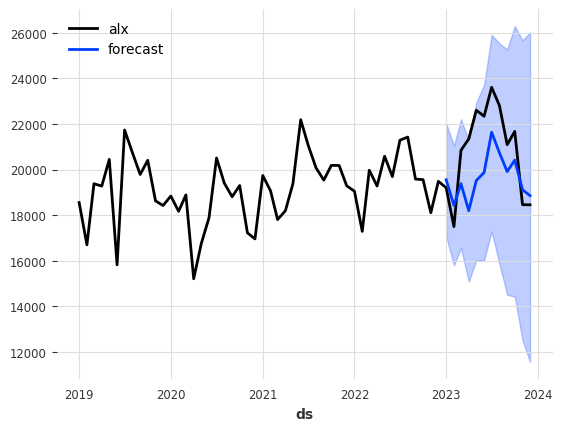

In [15]:
alxms.plot()
alxms_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [16]:
alxms_prediction.tail()

<TimeSeries (DataArray) (ds: 5, component: 1, sample: 50000)> Size: 2MB
array([[[21639.82472065, 24321.04560902, 23821.51419425, ...,
         22599.05707555, 17557.07882303, 17713.81485835]],

       [[20608.15103466, 22767.28761856, 18177.45088762, ...,
         18556.23601534, 18483.58648784, 14237.52219901]],

       [[22628.24158117, 22563.57402481, 20044.51185507, ...,
         19707.11260209, 16262.72546845, 14142.75318129]],

       [[23438.81106553, 21343.74001028, 20931.30904473, ...,
         20049.78709312, 17068.59257543, 12925.05706697]],

       [[22200.40444252, 19893.40236267, 17704.42213788, ...,
         19707.00124412, 17768.46483496, 11947.18022584]]])
Coordinates:
  * ds         (ds) datetime64[ns] 40B 2023-08-01 2023-09-01 ... 2023-12-01
  * component  (component) object 8B 'alx'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [18]:
alxms_prediction.values()

array([[22224.10128855],
       [19432.08007442],
       [19812.34878611],
       [20220.85497079],
       [21209.65003395],
       [20147.3492062 ],
       [25666.20711274],
       [21639.82472065],
       [20608.15103466],
       [22628.24158117],
       [23438.81106553],
       [22200.40444252]])

In [19]:
from permetrics import RegressionMetric
list_metrics = ["MSE","MAE","MedAE","MAPE", "SMAPE", "MASE", "RMSE", "R2"]

In [23]:
alxm_true = ts_alxms.univariate_values()
alxm_pred = alxms_prediction.univariate_values()

alxm_eval = RegressionMetric(alxm_true, alxm_pred)

alxm_reslist = []

for metric in list_metrics:
    alxm_reslist.append(alxm_eval.get_metric_by_name(metric))

print(alxm_reslist)

[{'MSE': 5630106.24780612}, {'MAE': 2007.3055677143966}, {'MedAE': 1664.215020237527}, {'MAPE': 0.10067918201574845}, {'SMAPE': 0.0477800522897345}, {'MASE': 1.5049319278120477}, {'RMSE': 2372.7844924910733}, {'R2': -0.5660725252597467}]


C:\Users\tony.dunsworth\anaconda3\envs\dartsess\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


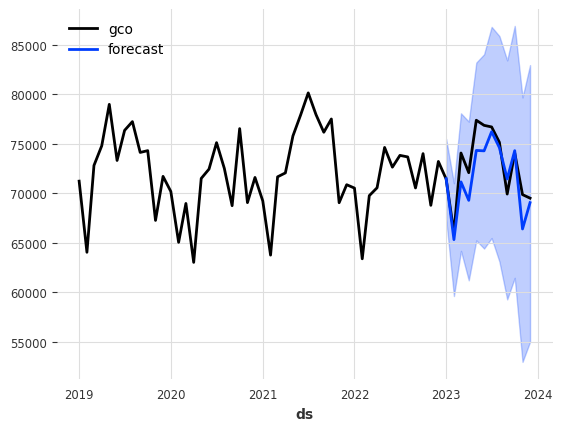

In [26]:
gcoms = TimeSeries.from_dataframe(gcom, "ds", "gco")
tr_gcoms = gcoms[:48]
ts_gcoms = gcoms[48:]

gcoms_model = ExponentialSmoothing()
gcoms_model.fit(tr_gcoms)
gcoms_prediction = gcoms_model.predict(len(ts_gcoms), num_samples=50000)

gcoms.plot()
gcoms_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [27]:
gcom_true = ts_gcoms.univariate_values()
gcom_pred = gcoms_prediction.univariate_values()

gcom_eval = RegressionMetric(gcom_true, gcom_pred)

gcom_reslist = []

for metric in list_metrics:
    gcom_reslist.append(gcom_eval.get_metric_by_name(metric))

print(gcom_reslist)

[{'MSE': 9581909.74580824}, {'MAE': 2598.2998079820923}, {'MedAE': 2065.9924522782385}, {'MAPE': 0.03609873351945408}, {'SMAPE': 0.01760050982157589}, {'MASE': 0.7720084784129171}, {'RMSE': 3095.465998167035}, {'R2': 0.16718130383003293}]


C:\Users\tony.dunsworth\anaconda3\envs\dartsess\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


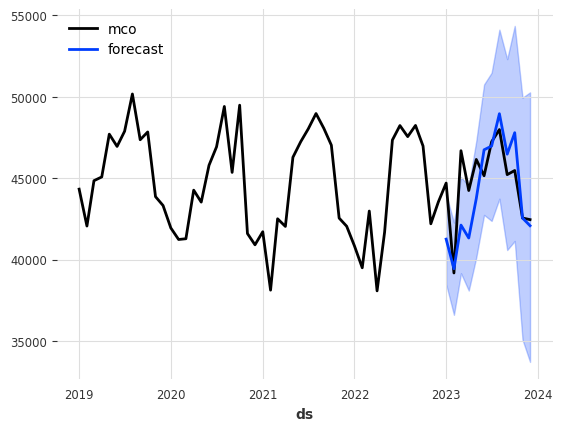

In [28]:
mcoms = TimeSeries.from_dataframe(mcom, "ds", "mco")
tr_mcoms = mcoms[:48]
ts_mcoms = mcoms[48:]

mcoms_model = ExponentialSmoothing()
mcoms_model.fit(tr_mcoms)
mcoms_prediction = mcoms_model.predict(len(ts_mcoms), num_samples=50000)

mcoms.plot()
mcoms_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [29]:
mcom_true = ts_mcoms.univariate_values()
mcom_pred = mcoms_prediction.univariate_values()

mcom_eval = RegressionMetric(mcom_true, mcom_pred)

mcom_reslist = []

for metric in list_metrics:
    mcom_reslist.append(mcom_eval.get_metric_by_name(metric))

print(mcom_reslist)

[{'MSE': 10029140.076578105}, {'MAE': 2640.886003816878}, {'MedAE': 2055.8473151801954}, {'MAPE': 0.05889617754486024}, {'SMAPE': 0.028654442731883653}, {'MASE': 1.0658110523182294}, {'RMSE': 3166.8817591722786}, {'R2': -0.8611356764897493}]


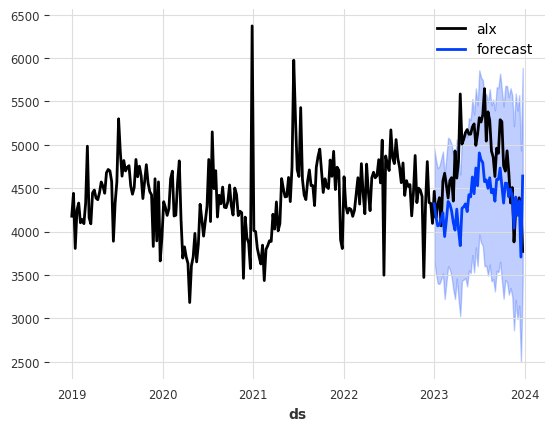

In [31]:
alxws = TimeSeries.from_dataframe(alxw, "ds", "alx")
tr_alxws = alxws[:209]
ts_alxws = alxws[209:]

alxws_model = ExponentialSmoothing()
alxws_model.fit(tr_alxws)
alxws_prediction = alxws_model.predict(len(ts_alxws), num_samples=50000)

alxws.plot()
alxws_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [32]:
alxw_true = ts_alxws.univariate_values()
alxw_pred = alxws_prediction.univariate_values()

alxw_eval = RegressionMetric(alxw_true, alxw_pred)

alxw_reslist = []

for metric in list_metrics:
    alxw_reslist.append(alxw_eval.get_metric_by_name(metric))

print(alxw_reslist)

[{'MSE': 389710.656324401}, {'MAE': 523.7144386844103}, {'MedAE': 497.01578521412375}, {'MAPE': 0.10760647697357495}, {'SMAPE': 0.05784348155844118}, {'MASE': 2.254721962933051}, {'RMSE': 624.2680965133497}, {'R2': -1.103044606711618}]


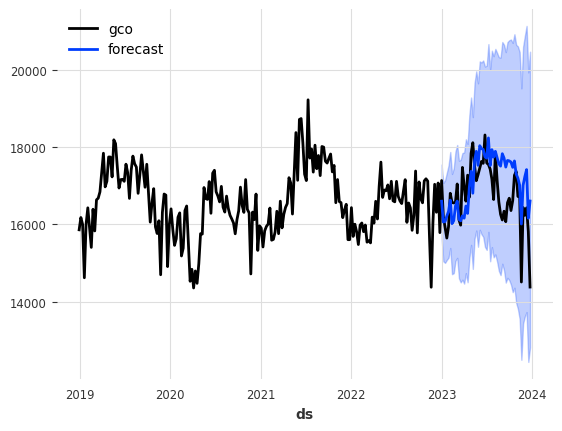

In [33]:
gcows = TimeSeries.from_dataframe(gcow, "ds", "gco")
tr_gcows = gcows[:209]
ts_gcows = gcows[209:]

gcows_model = ExponentialSmoothing()
gcows_model.fit(tr_gcows)
gcows_prediction = gcows_model.predict(len(ts_gcows), num_samples=50000)

gcows.plot()
gcows_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [34]:
gcow_true = ts_gcows.univariate_values()
gcow_pred = gcows_prediction.univariate_values()

gcow_eval = RegressionMetric(gcow_true, gcow_pred)

gcow_reslist = []

for metric in list_metrics:
    gcow_reslist.append(gcow_eval.get_metric_by_name(metric))

print(gcow_reslist)

[{'MSE': 640750.8316164608}, {'MAE': 680.9857276437232}, {'MedAE': 712.5673863164193}, {'MAPE': 0.04089798471943516}, {'SMAPE': 0.020091086224628855}, {'MASE': 1.3279143576443329}, {'RMSE': 800.4691322071457}, {'R2': -0.07157801803575281}]


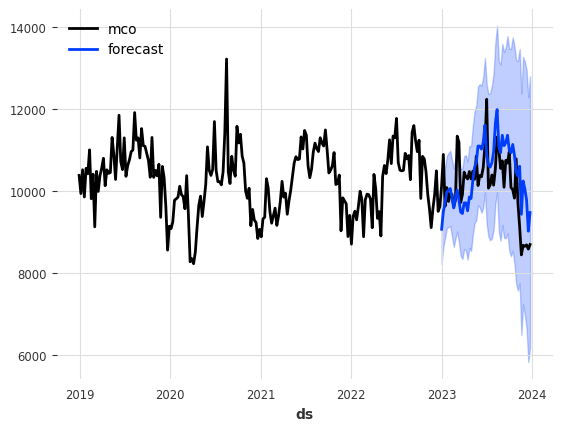

In [35]:
mcows = TimeSeries.from_dataframe(mcow, "ds", "mco")
tr_mcows = mcows[:209]
ts_mcows = mcows[209:]

mcows_model = ExponentialSmoothing()
mcows_model.fit(tr_mcows)
mcows_prediction = mcows_model.predict(len(ts_mcows), num_samples=50000)

mcows.plot()
mcows_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [36]:
mcow_true = ts_mcows.univariate_values()
mcow_pred = mcows_prediction.univariate_values()

mcow_eval = RegressionMetric(mcow_true, mcow_pred)

mcow_reslist = []

for metric in list_metrics:
    mcow_reslist.append(mcow_eval.get_metric_by_name(metric))

print(mcow_reslist)

[{'MSE': 566906.1277455903}, {'MAE': 629.227022778678}, {'MedAE': 501.7904509529535}, {'MAPE': 0.06173331676080225}, {'SMAPE': 0.030077844257701127}, {'MASE': 1.3817851430293049}, {'RMSE': 752.9316886315719}, {'R2': 0.03589787439133474}]


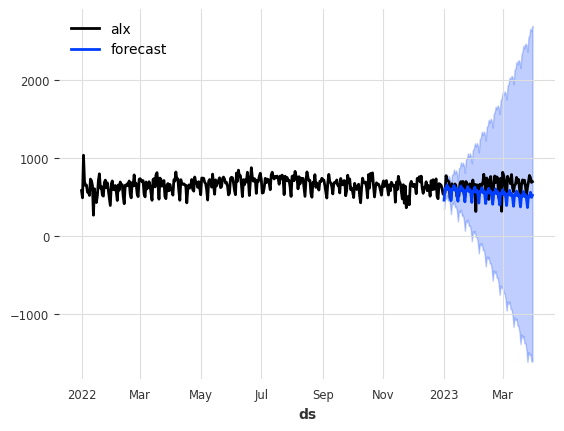

In [37]:
alxds = TimeSeries.from_dataframe(alxd, "ds", "alx")
tr_alxds = alxds[:365]
ts_alxds = alxds[365:]

alxds_model = ExponentialSmoothing()
alxds_model.fit(tr_alxds)
alxds_prediction = alxds_model.predict(len(ts_alxds), num_samples=50000)

alxds.plot()
alxds_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [38]:
alxd_true = ts_alxds.univariate_values()
alxd_pred = alxds_prediction.univariate_values()

alxd_eval = RegressionMetric(alxd_true, alxd_pred)

alxd_reslist = []

for metric in list_metrics:
    alxd_reslist.append(alxd_eval.get_metric_by_name(metric))

print(alxd_reslist)

[{'MSE': 282755.55475469766}, {'MAE': 356.91566169649343}, {'MedAE': 164.07397961145188}, {'MAPE': 0.5484577226409226}, {'SMAPE': 0.36764052620176846}, {'MASE': 3.367485835999991}, {'RMSE': 531.747641983204}, {'R2': -25.445890042995718}]


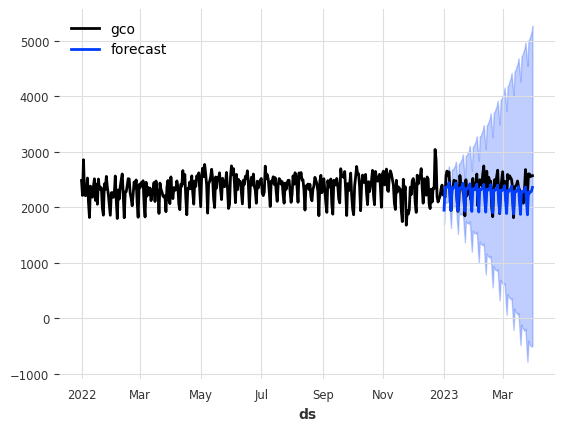

In [39]:
gcods = TimeSeries.from_dataframe(gcod, "ds", "gco")
tr_gcods = gcods[:365]
ts_gcods = gcods[365:]

gcods_model = ExponentialSmoothing()
gcods_model.fit(tr_gcods)
gcods_prediction = gcods_model.predict(len(ts_gcods), num_samples=50000)

gcods.plot()
gcods_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [40]:
gcod_true = ts_gcods.univariate_values()
gcod_pred = gcods_prediction.univariate_values()

gcod_eval = RegressionMetric(gcod_true, gcod_pred)

gcod_reslist = []

for metric in list_metrics:
    gcod_reslist.append(gcod_eval.get_metric_by_name(metric))

print(gcod_reslist)

[{'MSE': 534436.914366328}, {'MAE': 502.1412670783546}, {'MedAE': 259.44890987739745}, {'MAPE': 0.21048201560646415}, {'SMAPE': 0.13692551814391224}, {'MASE': 2.391532764487267}, {'RMSE': 731.0519231671086}, {'R2': -10.782471644601424}]


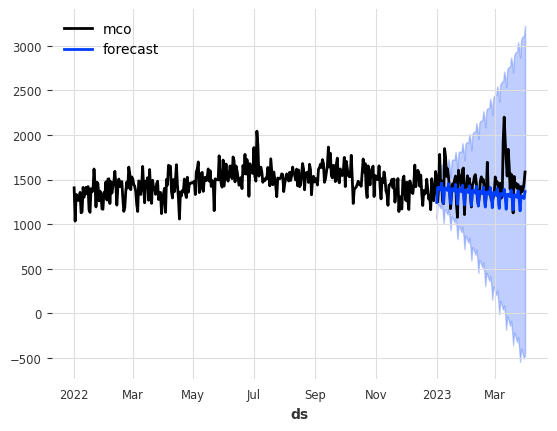

In [41]:
mcods = TimeSeries.from_dataframe(mcod, "ds", "mco")
tr_mcods = mcods[:365]
ts_mcods = mcods[365:]

mcods_model = ExponentialSmoothing()
mcods_model.fit(tr_mcods)
mcods_prediction = mcods_model.predict(len(ts_mcods), num_samples=50000)

mcods.plot()
mcods_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [42]:
mcod_true = ts_mcods.univariate_values()
mcod_pred = mcods_prediction.univariate_values()

mcod_eval = RegressionMetric(mcod_true, mcod_pred)

mcod_reslist = []

for metric in list_metrics:
    mcod_reslist.append(mcod_eval.get_metric_by_name(metric))

print(mcod_reslist)

[{'MSE': 303079.2757724784}, {'MAE': 388.05436039100914}, {'MedAE': 217.5975152622633}, {'MAPE': 0.26082440052999295}, {'SMAPE': 0.17746033858729537}, {'MASE': 2.490397899826926}, {'RMSE': 550.5263624682095}, {'R2': -7.694545466293372}]


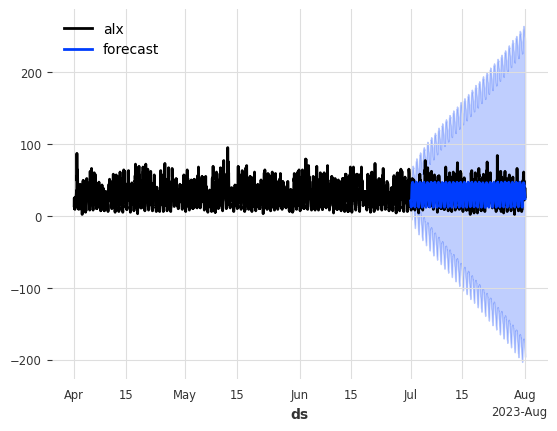

In [43]:
alxhs = TimeSeries.from_dataframe(alxh, "ds", "alx")
tr_alxhs = alxhs[:2184]
ts_alxhs = alxhs[2184:]

alxhs_model = ExponentialSmoothing()
alxhs_model.fit(tr_alxhs)
alxhs_prediction = alxhs_model.predict(len(ts_alxhs), num_samples=50000)

alxhs.plot()
alxhs_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [45]:
alxh_true = ts_alxhs.univariate_values()
alxh_pred = alxhs_prediction.univariate_values()

alxh_eval = RegressionMetric(alxh_true, alxh_pred)

alxh_reslist = []

for metric in list_metrics:
    alxh_reslist.append(alxh_eval.get_metric_by_name(metric))

print(alxh_reslist)

[{'MSE': 13947.838148026798}, {'MAE': 109.55934496040501}, {'MedAE': 123.84866802763139}, {'MAPE': 4.8674273124902445}, {'SMAPE': 0.9341551166189751}, {'MASE': 12.96426075897132}, {'RMSE': 118.10096590640907}, {'R2': -59.36715398585611}]


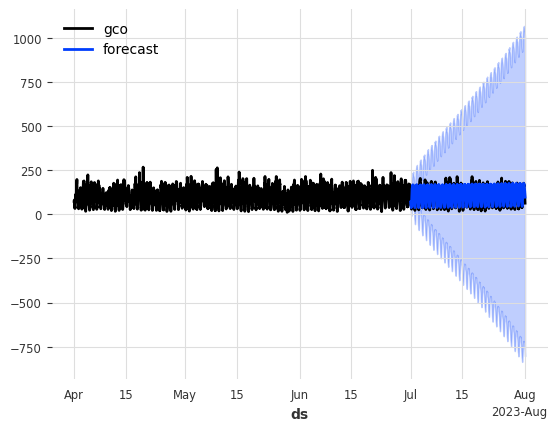

In [46]:
gcohs = TimeSeries.from_dataframe(gcoh, "ds", "gco")
tr_gcohs = gcohs[:2184]
ts_gcohs = gcohs[2184:]

gcohs_model = ExponentialSmoothing()
gcohs_model.fit(tr_gcohs)
gcohs_prediction = gcohs_model.predict(len(ts_gcohs), num_samples=50000)

gcohs.plot()
gcohs_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [47]:
gcoh_true = ts_gcohs.univariate_values()
gcoh_pred = gcohs_prediction.univariate_values()

gcoh_eval = RegressionMetric(gcoh_true, gcoh_pred)

gcoh_reslist = []

for metric in list_metrics:
    gcoh_reslist.append(gcoh_eval.get_metric_by_name(metric))

print(gcoh_reslist)

[{'MSE': 220477.9395058348}, {'MAE': 434.30208654192}, {'MedAE': 490.59654261163644}, {'MAPE': 5.704011933996536}, {'SMAPE': 0.9277190641520933}, {'MASE': 22.809532077517957}, {'RMSE': 469.550784799509}, {'R2': -97.55914113351963}]


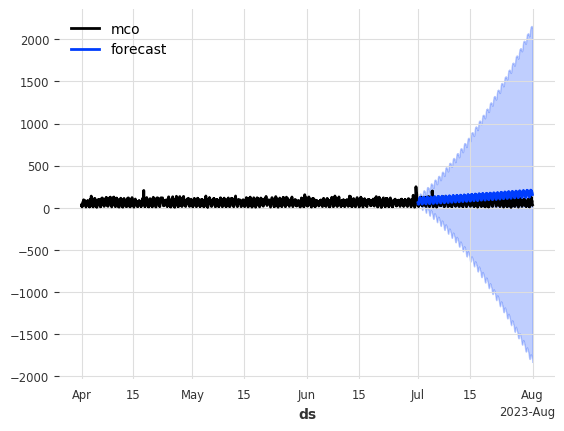

In [48]:
mcohs = TimeSeries.from_dataframe(mcoh, "ds", "mco")
tr_mcohs = mcohs[:2184]
ts_mcohs = mcohs[2184:]

mcohs_model = ExponentialSmoothing()
mcohs_model.fit(tr_mcohs)
mcohs_prediction = mcohs_model.predict(len(ts_mcohs), num_samples=50000)

mcohs.plot()
mcohs_prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [49]:
mcoh_true = ts_mcohs.univariate_values()
mcoh_pred = mcohs_prediction.univariate_values()

mcoh_eval = RegressionMetric(mcoh_true, mcoh_pred)

mcoh_reslist = []

for metric in list_metrics:
    mcoh_reslist.append(mcoh_eval.get_metric_by_name(metric))

print(mcoh_reslist)

[{'MSE': 1009824.1020877339}, {'MAE': 870.9127577324152}, {'MedAE': 917.4738137681413}, {'MAPE': 21.48002973923503}, {'SMAPE': 0.9278918917713715}, {'MASE': 64.24624493597939}, {'RMSE': 1004.9000458193511}, {'R2': -998.9473029609053}]
